# Importar bibliotecas necesarias

En esta sección, importaremos las bibliotecas esenciales para el análisis y modelado de datos: pandas, numpy, matplotlib, seaborn y scikit-learn.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Cargar y explorar el conjunto de datos Telco

A continuación, cargamos el archivo CSV del conjunto de datos Telco y exploramos sus primeras filas, tipos de datos y estadísticas descriptivas.

In [13]:
# Cambia la ruta al archivo CSV según corresponda
try:
	df = pd.read_csv('telco_customer_churn.csv')
except FileNotFoundError:
	print("Error: The file 'telco-customer-churn.csv' was not found.")
	# Provide an alternative action, e.g., load a default dataset or exit
	# For example:
	# df = pd.DataFrame()  # Create an empty DataFrame
	raise  # Re-raise the exception if you cannot proceed

# Mostrar las primeras filas
display(df.head())

# Mostrar tipos de datos
print(df.dtypes)

# Estadísticas descriptivas
display(df.describe(include='all'))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,TC-0000001,Male,0,No,No,59,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.00,1262.07,No
1,TC-0000002,Female,1,Yes,No,72,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,104.02,7235.23,Yes
2,TC-0000003,Female,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),28.75,137.94,No
3,TC-0000004,Female,0,No,No,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),43.20,1036.37,Yes
4,TC-0000005,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,31.65,1128.03,Yes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6888,2
top,TC-0000001,Male,NaN,Yes,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3624,NaN,3589,4962,NaN,6376,3615,3179,3955,...,3668,3918,3325,3297,3939,4186,2377,NaN,69,3717
mean,NaN,NaN,0.159875,NaN,NaN,18.738322,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.275513,NaN,NaN
std,NaN,NaN,0.366516,NaN,NaN,17.660791,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.805000,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.755000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.110000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.530000,NaN,NaN


# Limpieza y preprocesamiento de datos

En esta sección, limpiamos los valores nulos, convertimos variables categóricas y normalizamos los datos según sea necesario.

In [14]:
# Identificar valores nulos
print(df.isnull().sum())

# Eliminar filas o columnas con muchos nulos si es necesario
# df = df.dropna()  # Descomenta si deseas eliminar filas con nulos

# Ejemplo: Rellenar valores nulos en columnas numéricas con la mediana
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Convertir variables categóricas a tipo 'category'
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category')

# Codificar variables categóricas
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Normalizar variables numéricas
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Análisis exploratorio de datos (EDA)

Realizamos análisis estadísticos y examinamos correlaciones entre variables para entender mejor el conjunto de datos.

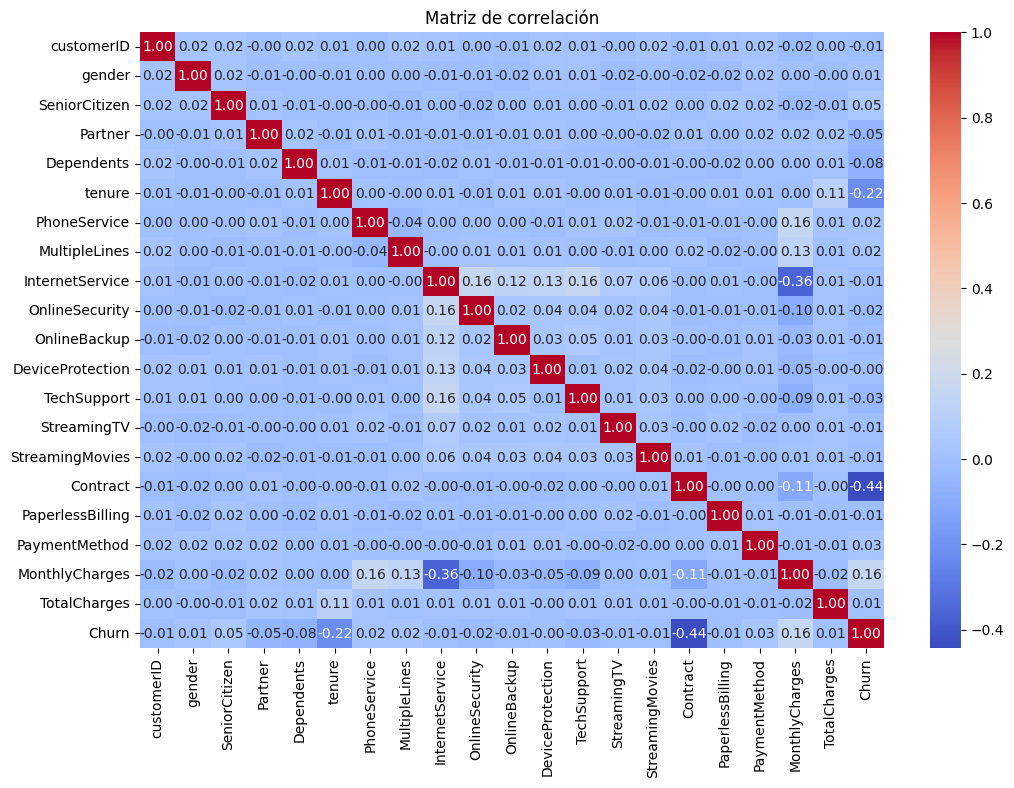

Churn
0    3717
1    3326
Name: count, dtype: int64
Churn
0    0.527758
1    0.472242
Name: proportion, dtype: float64


In [15]:
# Correlación entre variables
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Estadísticas de la variable objetivo (por ejemplo, 'Churn')
if 'Churn' in df.columns:
    print(df['Churn'].value_counts())
    print(df['Churn'].value_counts(normalize=True))

# Visualización de datos

Creamos gráficos de barras, histogramas y diagramas de dispersión para visualizar patrones y relaciones en los datos.

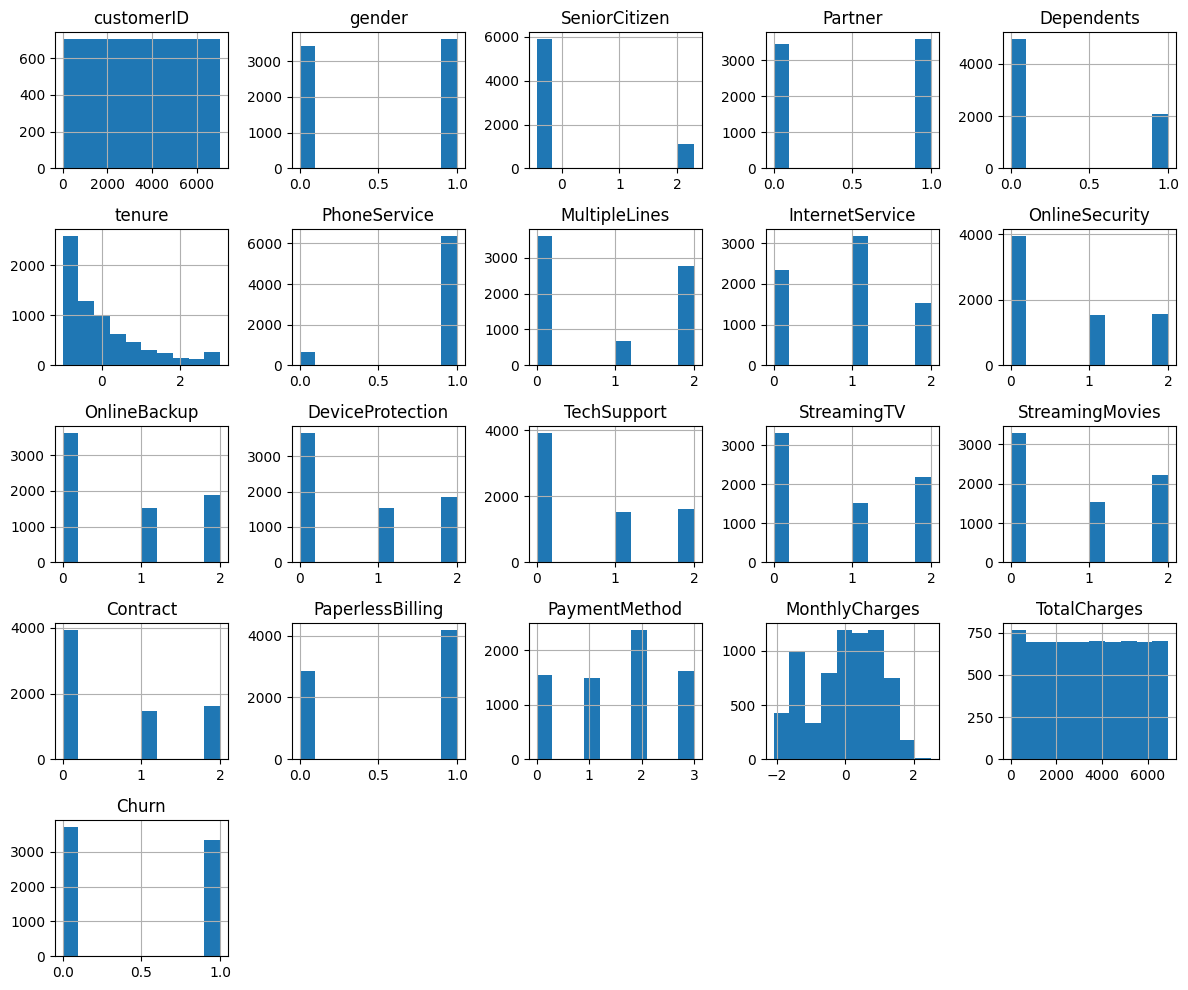

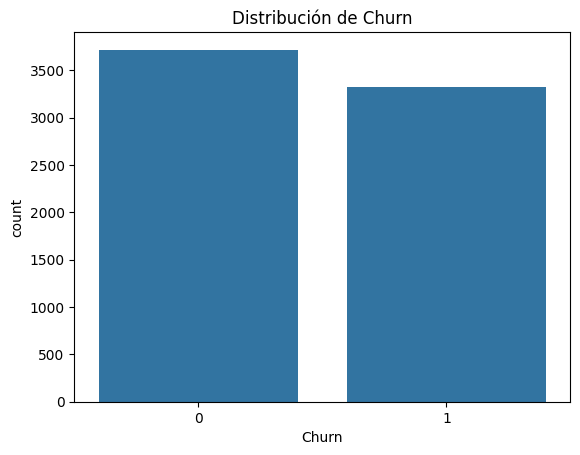

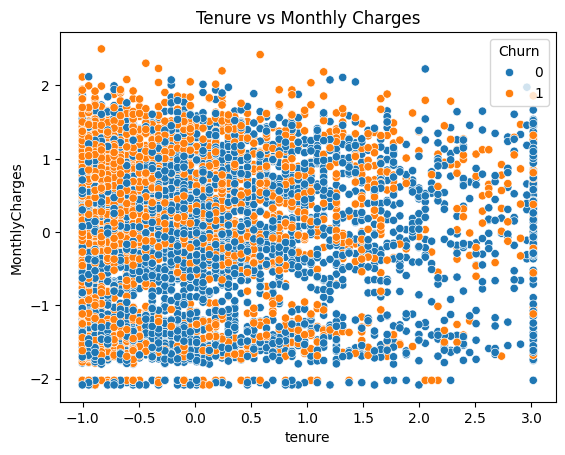

In [16]:
# Histograma de una variable numérica
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# Gráfico de barras para la variable objetivo
if 'Churn' in df.columns:
    sns.countplot(x='Churn', data=df)
    plt.title('Distribución de Churn')
    plt.show()

# Diagrama de dispersión entre dos variables
if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
    sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
    plt.title('Tenure vs Monthly Charges')
    plt.show()

# Preparación de datos para modelado

Dividimos los datos en conjuntos de entrenamiento y prueba, y realizamos la codificación de variables si es necesario.

In [17]:
# Definir variables predictoras y objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Tamaño de entrenamiento: {X_train.shape}')
print(f'Tamaño de prueba: {X_test.shape}')

Tamaño de entrenamiento: (5634, 20)
Tamaño de prueba: (1409, 20)


# Entrenamiento de un modelo de clasificación

Entrenamos un modelo de clasificación, como un árbol de decisión o regresión logística, para predecir la variable objetivo.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Decision Tree
param_grid_dt = {'max_depth': [3, 5, 7, 10],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 3, 5]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
dt_model = grid_search_dt.best_estimator_

# Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10],
                   'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
                           param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
lr_model = grid_search_lr.best_estimator_

# Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],
                   'max_depth': [None, 5, 10],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 3, 5]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
rf_model = grid_search_rf.best_estimator_

# Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200],
                   'learning_rate': [0.01, 0.1, 0.2],
                   'max_depth': [3, 5, 7]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                           param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
gb_model = grid_search_gb.best_estimator_

# Evaluación del modelo

Evaluamos el desempeño de los modelos utilizando métricas como precisión, recall, F1-score y la matriz de confusión.

Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       744
           1       0.70      0.71      0.70       665

    accuracy                           0.72      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.72      0.72      0.72      1409

Matriz de confusión:
[[542 202]
 [194 471]]

Regresión Logística:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       744
           1       0.70      0.75      0.73       665

    accuracy                           0.73      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.73      0.73      0.73      1409

Matriz de confusión:
[[527 217]
 [163 502]]

Random Forest:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       744
           1       0.71      0.71      0.71       665

    accuracy                         

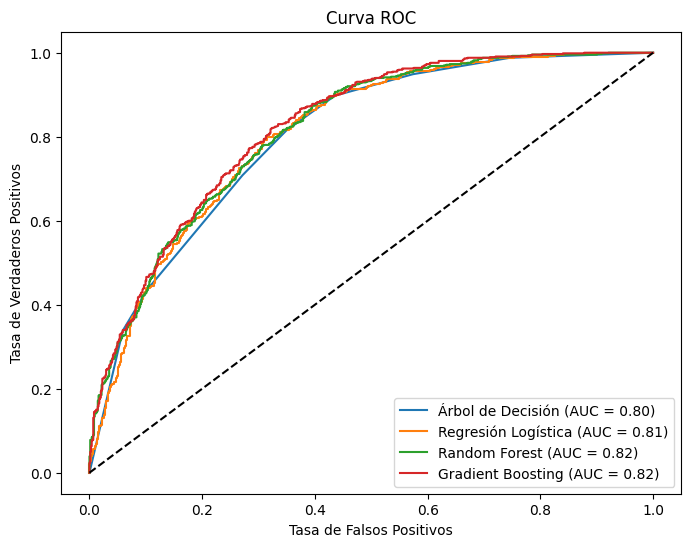

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predicciones
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluación árbol de decisión
print("Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt))

# Evaluación regresión logística
print("\nRegresión Logística:")
print(classification_report(y_test, y_pred_lr))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_lr))

# Evaluación Random Forest
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluación Gradient Boosting
print("\nGradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_gb))

# Calcular probabilidades para ROC AUC
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Calcular ROC AUC
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

print(f'ROC AUC Árbol de Decisión: {roc_auc_dt}')
print(f'ROC AUC Regresión Logística: {roc_auc_lr}')
print(f'ROC AUC Random Forest: {roc_auc_rf}')
print(f'ROC AUC Gradient Boosting: {roc_auc_gb}')

# Calcular la curva ROC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Árbol de Decisión (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Decisión del modelo

En este caso, con los resultados obtenidos el mejor método a utilizar será el Random Forest, ya que presenta la mejor puntuación en todas las métricas evaluadas, incluyendo la AUC-ROC.